### Орындаған: Нуриддинов Отабек
#### Бұл жұмыста мен k-means алгоритміні программалық түрде шешіп графикьер алдым. Ол үшін Kmeans классын құрып алдым. Осы класстың ішінде алгоритмнің реализациясын жасадым. Бұл класстың ішінде келесі функциялыр бар
- **diff()** - екі нүкте арасындағы қашықтықты есептеу үшін
- **set_center()** - кластерлердің центрлерін өзіміз бере алуымыз үшін
- **find_center()** - кластердің центрін (басқа нүктелердің орташа мәні арқылы) есептеу 
- **plot()** - кластерлерді визуализация жасау(2D және 3D жағдайы үшін)
- **fit()** - моделімізді үйрету үшін
- **predict()** - болжам жасау үшін

In [1]:
# керекті модульдер
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [2]:
# әдістің классы
class Kmeans:
    dim = 0
    # классты инициализация жасау (кластерлер санын, максималды итерация санын, итерация тоқтауы үшін максималды қашықтық)
    def __init__(self, n_cluster, max_iter = 100, tol = 1e-04):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.tol = tol
        self.centers = []
    # нүктелердің ара қашықтығын есептеу
    def diff(a, b):
        sm = 0
        for i in range(len(a)):
            sm += (a[i] - b[i])**2
        return m.sqrt(sm)
    # центрлерді қолдан(рандомно емес) беру
    def set_center(self, centers):
        self.centers = centers
    # центрлерді есептеу
    def find_center(cluster):
        if(len(cluster) > 0):
            points = np.full((len(cluster[0])), 0.0)
            for j in range(len(cluster[0])):
                for i in cluster:
                    points[j] += i[j]
                points[j] /= len(cluster)
            return points
    # графигін салу
    def plot(self, title='k-means әдісімен кластерге бөлінген нүктелер'):
#         %matplotlib notebook
        if self.dim == 2:# 2 өлшемді болса
            fig = plt.figure(figsize=(9,5))
            plt.title(title)
            plt.xlabel('X')
            plt.xlabel('Y')
            for i in range(len(self.centers)):
                color = np.random.randint(0,255, 3)
                if(len(self.centers[i]) > 0):
                    plt.scatter(self.centers[i][0], self.centers[i][1], marker="^", c = color/255.0, linewidths=(12), alpha=(0.5))
                    for j in range(len(self.clusters[i])):
                        plt.scatter(self.clusters[i][j][0], self.clusters[i][j][1], c = color/255.0)
        elif self.dim == 3:# 3 өлшемді болса
            fig = plt.figure(figsize=(9,5))
            ax = fig.add_subplot(projection='3d')
            ax.set_title(title)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            for i in range(len(self.centers)):
                color = np.random.randint(0,255, 3)
                if(len(self.centers[i]) > 0):
                    ax.scatter(self.centers[i][0], self.centers[i][1], self.centers[i][2],marker="^", c = color/255.0, linewidths=(12), alpha=(0.5))
                    for j in range(len(self.clusters[i])):
                        ax.scatter(self.clusters[i][j][0], self.clusters[i][j][1], self.clusters[i][j][2], c = color/255.0)
        plt.show()
    # моделді оқыту
    def fit(self,pixels):
        self.dim = len(pixels[0])
        if len(self.centers) < 1:
            self.centers = np.full((self.n_cluster, self.dim), 0.0)
        tolerances = np.full((self.n_cluster), float("inf"))
        self.clusters = list()
        for i in range(self.n_cluster):
            self.centers[i] = np.random.randint(0,20,self.dim)# егер центрлер берілмеген болса рандомно беру
        for i in range(self.n_cluster-1):
            self.clusters.append(list())
        self.clusters.append(pixels)
        self.plot(title='Бастапқы нүктелер(пикселдер мен центрлер)')
        self.clusters = list()
        for i in range(self.n_cluster):
            self.clusters.append(list())
        iter = 0
        while(iter < self.max_iter):# негізгі цикл
            if float(max(tolerances)) > float(self.tol): # алдынғы және осы итерациядағы максималды қашықтық берілген мәннен кіші болса итерация тоқтайды
                break
            self.clusters = list()
            for j in range(len(self.centers)):
                self.clusters.append(list())
            # пикселдерді кластерлерге бөліп шығу
            for i in pixels:
                min_diff = float("inf")
                for j in range(len(self.centers)):
                    if Kmeans.diff(i,self.centers[j]) < min_diff:
                        min_diff = Kmeans.diff(i,self.centers[j])
                        mn_j = j
                self.clusters[mn_j].append(list(i))
            min_diff = float("inf")
            # кластерлер центрін өзгерту
            for i in range(len(self.clusters)):
                if len(self.clusters[i]) > 0:
                    old_center = list()
                    old_center = self.centers[i]
                    new_center = Kmeans.find_center(self.clusters[i])
                    tolerances[i] = Kmeans.diff(old_center, new_center)
                    self.centers[i] = new_center
                else:
                    tolerances[i] = 0
            iter += 1
        print('Centers: ')
        print(self.centers)
        print('Iteration: ', iter)
    # болжам жасау
    def predict(self, pixel):
        mn_i = 0
        min_diff = float("inf")
        for i in self.centers:
            if len(i) > 0:
                if Kmeans.diff(i, pixel) < min_diff:
                    mn_i = i
        print("Class: ",mn_i)
         

### Жоғарыдағы кодты пайдаланып 2 өлшемді нүктелер үшін кластеризация жасап көрелік, нүктелерді ойдан алдым, ал центрлерді программа рандомно таңдайды

In [3]:
pixels = np.array([[2,3],[-2,-3],[2,7],[10,19],[30,40],[15,1],[-15,34],[7,8],[9,3],[12,4],[4,3],[7,-2],[-4,15]])
pixels

array([[  2,   3],
       [ -2,  -3],
       [  2,   7],
       [ 10,  19],
       [ 30,  40],
       [ 15,   1],
       [-15,  34],
       [  7,   8],
       [  9,   3],
       [ 12,   4],
       [  4,   3],
       [  7,  -2],
       [ -4,  15]])

### Нәтижесінде бізде 2 график бар, біріншісі бастапқы нүктелердің орналасуын салып тұр. Ал екінші графигіміз кластеризациядан кейінгі нәтиже.

<IPython.core.display.Javascript object>


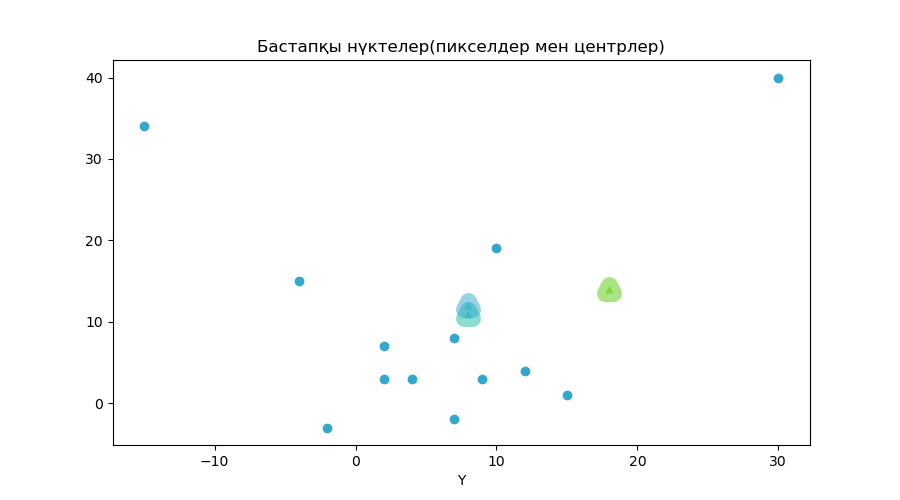

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Centers: 
[[30.         40.        ]
 [ 6.22222222  2.66666667]
 [-3.         22.66666667]]
Iteration:  2


<IPython.core.display.Javascript object>


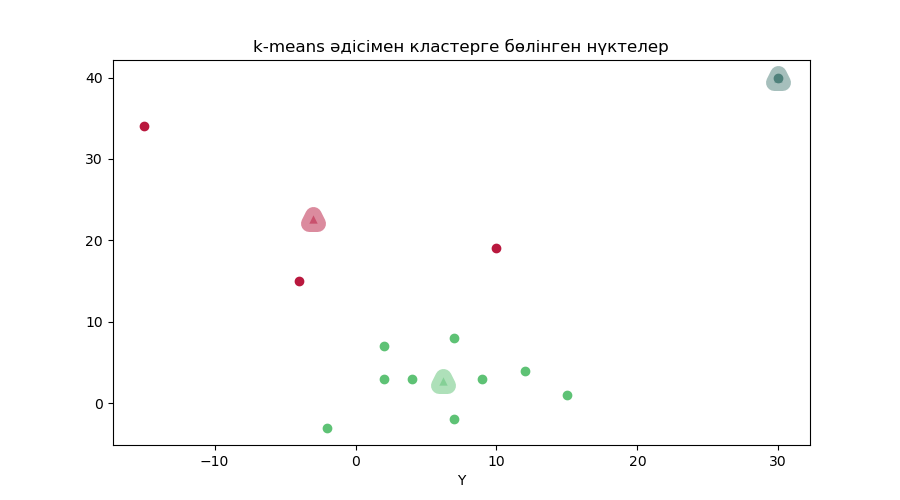

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

[[[30, 40]],
 [[2, 3], [-2, -3], [2, 7], [15, 1], [7, 8], [9, 3], [12, 4], [4, 3], [7, -2]],
 [[10, 19], [-15, 34], [-4, 15]]]

In [16]:
model2D = Kmeans(3,10, 0.000001)
model2D.fit(pixels)
model2D.plot()
model2D.clusters

### Дәл солай 3 өлшемді нүктелер үшін

In [7]:
pixels3D = np.array([[20,50,20],[-10,-22,-5],[-19,7,8],[3,-7,6],[4,15,-9],[18,6,-20],[-13,9,4],[8,3,9],[1,-2,0],[11,12,9],[1,7,3],])
for i in pixels3D:
    print(i)

[-10 -22  -5]
[-19   7   8]
[ 3 -7  6]
[ 4 15 -9]
[ 18   6 -20]
[-13   9   4]
[8 3 9]
[ 1 -2  0]
[11 12  9]
[1 7 3]


<IPython.core.display.Javascript object>


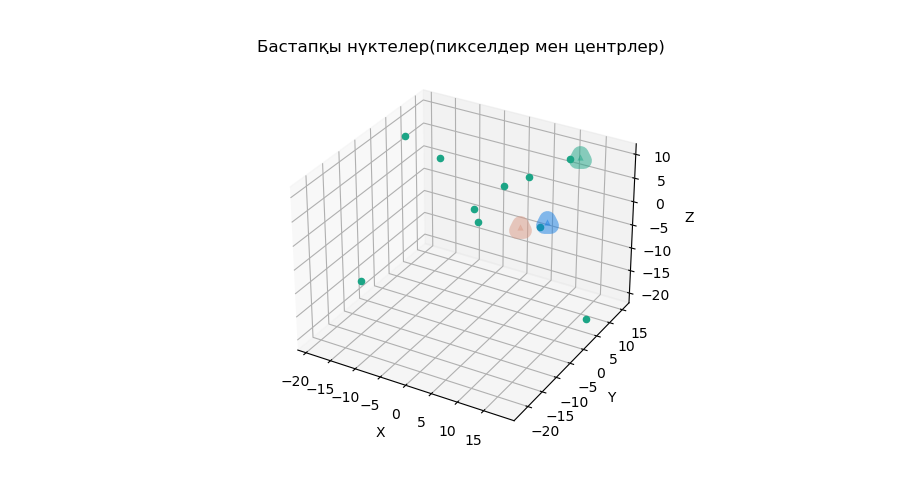

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Centers: 
[[ -7.6         -3.           2.6       ]
 [ 11.          10.5        -14.5       ]
 [  6.66666667   7.33333333   7.        ]]
Iteration:  4


<IPython.core.display.Javascript object>


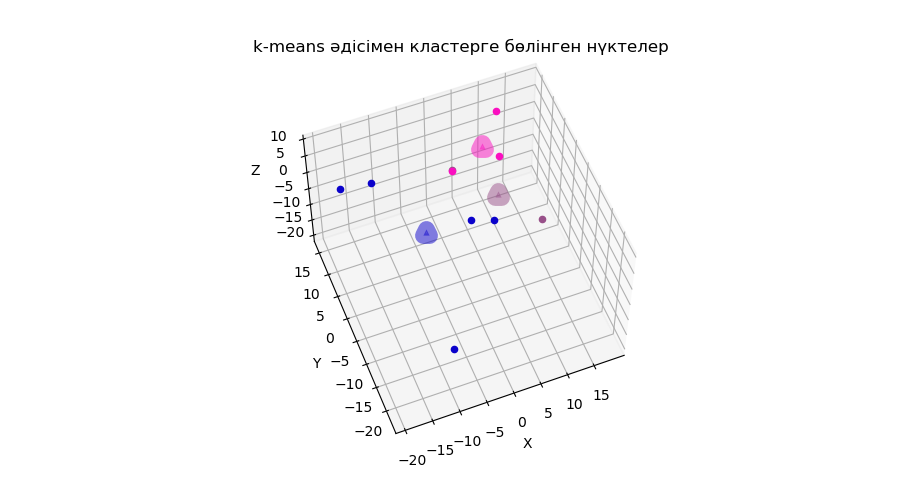

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

In [17]:
%matplotlib notebook
model = Kmeans(3,10, 0.0001)
model.fit(pixels3D)
model.plot()

#### қандай да данныймен болжам жасап көре аламыз

In [21]:
model.predict([2,5,8])
model.centers

Class:  [ 11.   10.5 -14.5]


[array([-5.  ,  8.75,  6.  ]),
 array([ 0.5, -7. ,  2.5]),
 array([ 11. ,  10.5, -14.5])]

<IPython.core.display.Javascript object>


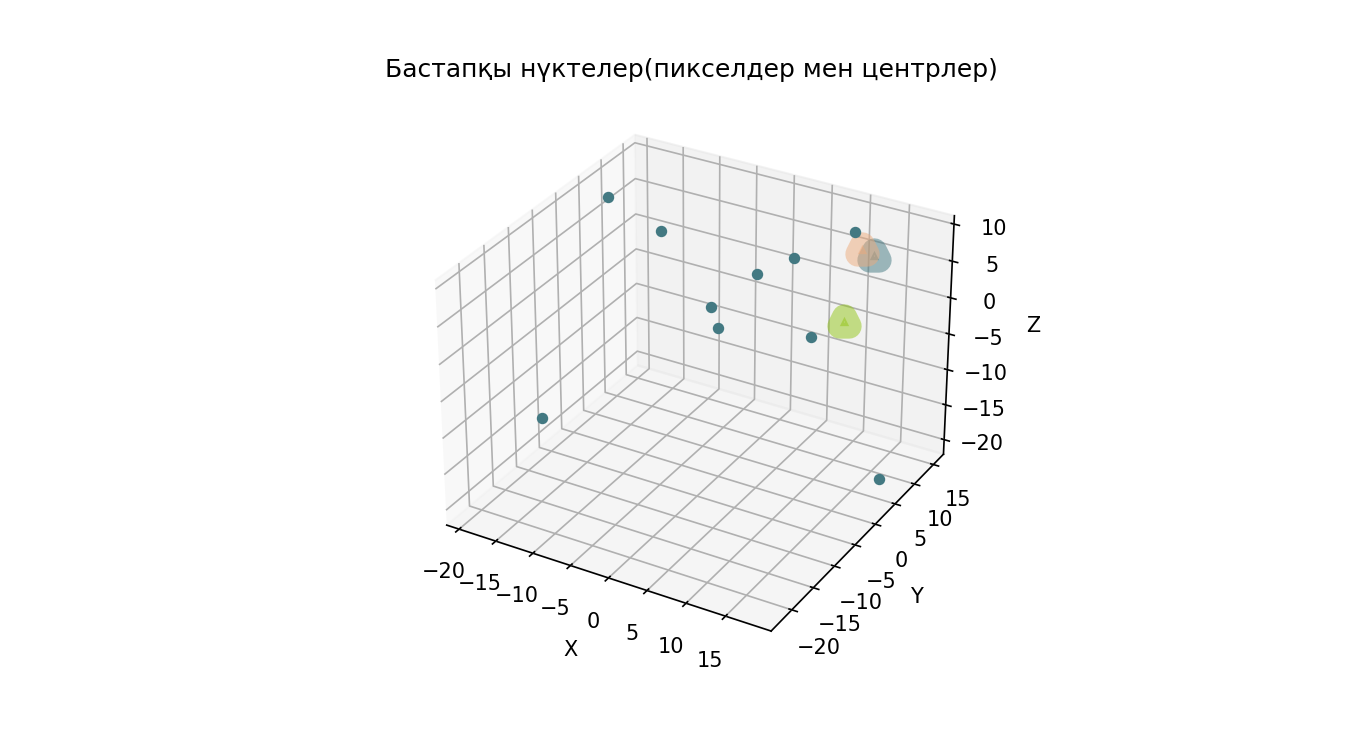

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Centers: 
[array([-5.  ,  8.75,  6.  ]), array([ 0.5, -7. ,  2.5]), array([ 11. ,  10.5, -14.5])]
Iteration:  3


<IPython.core.display.Javascript object>


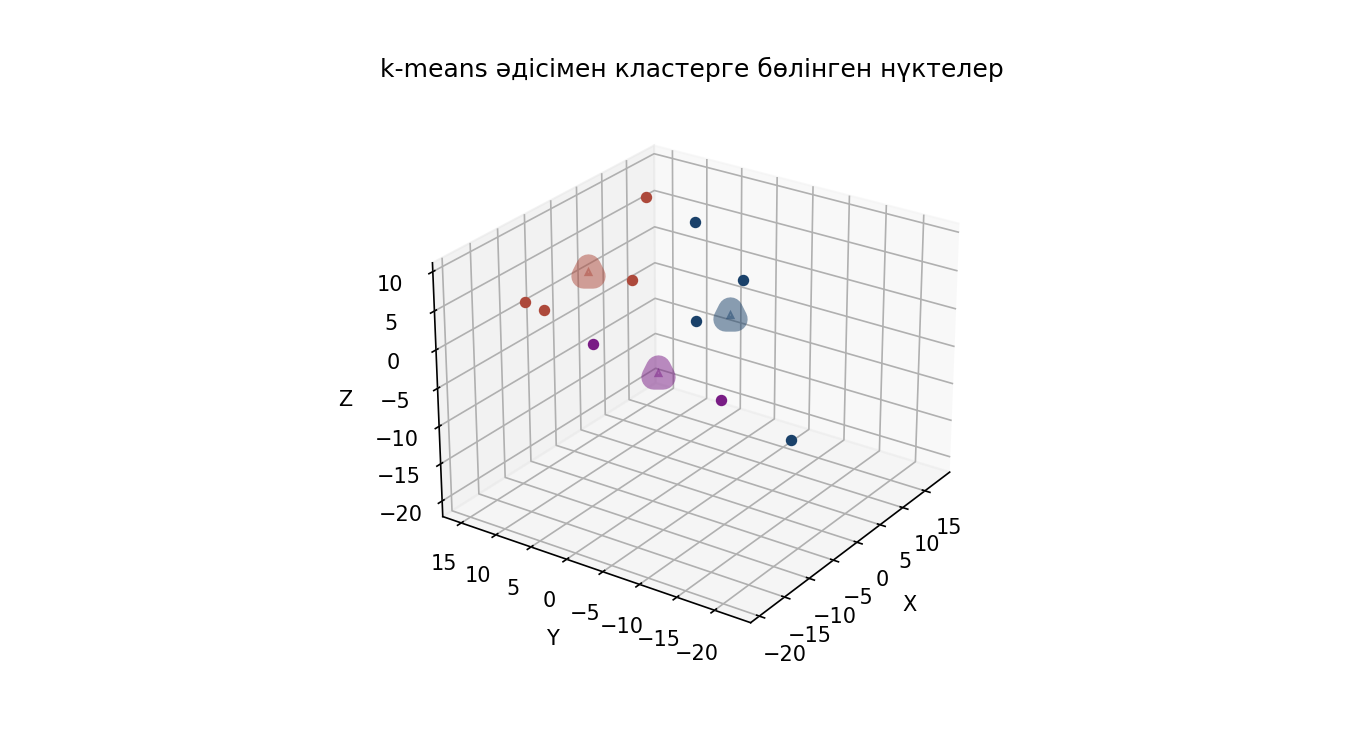

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

In [19]:
model = Kmeans(3,10, 0.0001)
model.set_center([[-10,-20,-10],[15,45,22],[5,9,7]]);
model.fit(pixels3D)
model.plot()